In [ ]:
# Instale e carregue o pacote readr
if (!requireNamespace("readr", quietly = TRUE)) {
  install.packages("readr")
}
library(readr)

# URL do arquivo CSV no GitHub
url <- "https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv"

# Carrega o arquivo CSV com readr e define a codificação correta
fifa <- read_csv2(url, locale = locale(encoding = "ISO-8859-1"))

# Verifique a estrutura e exiba as primeiras linhas
str(fifa)
head(fifa)


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 718 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (5): name, full_name, nationality, national_team, club_team
dbl (25): id, overall_rating, value_euro, wage_euro, age, height_cm, weight_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [718 × 30] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                           : num [1:718] 158023 153079 211110 201399 226226 ...
 $ name                         : chr [1:718] "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr [1:718] "Lionel Andrés Messi Cuccittini" "Sergio Leonel Agüero del Castillo" "Paulo Bruno Exequiel Dybala" "Mauro Emanuel Icardi Rivero" ...
 $ overall_rating               : num [1:718] 94 89 89 87 82 77 77 78 79 79 ...
 $ value_euro                   : num [1:718] 110500000 64500000 89000000 64500000 30000000 ...
 $ wage_euro                    : num [1:718] 565000 300000 205000 130000 83000 28000 27000 53000 19000 54000 ...
 $ nationality                  : chr [1:718] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ national_team                : chr [1:718] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ club_team                    : chr [1:718] "FC Barcelona" "Manchester City" "Juventus" "Inter" ...
 $ 

id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,⋯,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,⋯,86,95,70,92,97,68,66,94,48,8
153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,⋯,70,93,77,81,89,81,73,83,65,14
211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,⋯,82,84,68,87,92,75,65,88,48,8
201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,⋯,46,91,91,73,77,94,76,70,56,9
226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,⋯,75,77,59,82,84,64,69,76,65,14
199667,Funes Mori,José Ramiro Funes Mori,77,8500000,28000,Argentina,Argentina,Villarreal CF,28,⋯,66,40,79,70,63,77,78,56,83,7


### 1. Identification of a Variable of Each Type

In the FIFA dataset, we identified the following variables to represent each required data type:

- **Nominal Qualitative**: `nationality`  
  - **Reason**: Represents the players' nationality, which is a categorical variable without any hierarchy.
  
- **Ordinal Qualitative**: `international_reputation(1-5)`  
  - **Reason**: Represents the players' international reputation on a scale from 1 to 5. This variable has an inherent order, as higher levels indicate greater reputation.
  
- **Discrete Quantitative**: `finishing`  
  - **Reason**: Represents the players' finishing ability on a scale from 0 to 100, assuming integer values that can be counted.
  
- **Continuous Quantitative**: `height_cm`  
  - **Reason**: Represents the players' height in centimeters, which can take any value within a continuous range.


In [ ]:
# Carrega as bibliotecas necessárias
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}
library(dplyr)

# Tabela de frequência para a variável 'nationality' ordenada do maior para o menor
nationality_freq <- as.data.frame(sort(table(fifa$nationality), decreasing = TRUE))
colnames(nationality_freq) <- c("Nationality", "Frequency")
nationality_freq


Nationality,Frequency
<fct>,<int>
Brazil,23
Denmark,23
England,23
France,23
Germany,23
Netherlands,23
Scotland,23
Spain,23
United States,23


In [ ]:
# Tabela de frequência para a variável 'club_team' ordenada do maior para o menor
club_team_freq <- as.data.frame(sort(table(fifa$club_team), decreasing = TRUE))
colnames(club_team_freq) <- c("Club_Team", "Frequency")
club_team_freq

Club_Team,Frequency
<fct>,<int>
FC Bayern Munchen,14
Juventus,14
Tottenham Hotspur,14
Celtic,12
Manchester United,12
Atletico Madrid,11
FC Barcelona,11
Real Madrid,11
Chelsea,10


### 2. Frequency Tables for Qualitative Variables

Frequency tables were generated for the qualitative variables **`nationality`** and **`club_team`**, showing the number of occurrences for each category in the dataset. The tables were sorted in descending order and converted into dataframes for easier visualization.

#### Key Insights
- **Most frequent nationalities**:
  - `Brazil`, `Denmark`, `England`, `France`, `Germany`, `Netherlands`, `Scotland`, `Spain`, `United States` - each with 23 players.
  
- **Most frequent clubs**:
  - `FC Bayern Munchen`, `Juventus`, `Tottenham Hotspur` - each with 14 players.
  
These tables allow for quick identification of the most represented nationalities and clubs in the dataset.


In [ ]:
# Evitar notação científica
options(scipen = 999)

# Carrega as bibliotecas necessárias
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}
library(dplyr)

# Função alternativa para calcular a moda sem dependência de pacotes
calc_mode <- function(x) {
  unique_x <- unique(na.omit(x)) # Remove NA e valores duplicados
  unique_x[which.max(tabulate(match(x, unique_x)))] # Retorna o valor mais frequente
}

# Função para calcular as medidas de posição e variabilidade com arredondamento
calc_measures <- function(data, variable) {
  var_data <- data[[variable]]
  measures <- data.frame(
    Variável = variable,
    Média = round(mean(var_data, na.rm = TRUE), 4),
    Mediana = round(median(var_data, na.rm = TRUE), 4),
    Q1 = round(quantile(var_data, 0.25, na.rm = TRUE), 4),
    Q3 = round(quantile(var_data, 0.75, na.rm = TRUE), 4),
    Moda = calc_mode(var_data), # Usando a função alternativa para calcular a moda
    DesvioPadrão = round(sd(var_data, na.rm = TRUE), 4),
    Variância = round(var(var_data, na.rm = TRUE), 4),
    Amplitude = round(max(var_data, na.rm = TRUE) - min(var_data, na.rm = TRUE), 4),
    CoeficiênteDeVariação = round((sd(var_data, na.rm = TRUE) / mean(var_data, na.rm = TRUE)) * 100, 4),
    row.names = NULL # Remove nomes de linha personalizados
  )
  return(measures)
}

# Verifique se a lista de variáveis não contém duplicatas
variables <- unique(c("overall_rating", "age", "height_cm", "wage_euro", "value_euro"))

# Calcula as medidas e remove qualquer duplicata no resultado final
results <- do.call(rbind, lapply(variables, calc_measures, data = fifa))

# Remove duplicatas pelo nome da variável na tabela final
results <- results[!duplicated(results$Variável), ]

# Redefine o índice do dataframe para ser numérico e sequencial
rownames(results) <- NULL

# Exibe a tabela final com as medidas
results


Variável,Média,Mediana,Q1,Q3,Moda,DesvioPadrão,Variância,Amplitude,CoeficiênteDeVariação
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
overall_rating,76.4610,76,72,80,74,6.0184,36.2209,36,7.8712
age,26.5655,26,24,29,26,3.5892,12.8820,19,13.5106
height_cm,177.0237,183,170,188,188,14.3163,204.9576,51,8.0872
wage_euro,49559.8886,27000,10000,59000,1000,65224.9078,4254288598.0350,564000,131.6083
value_euro,13897694.9861,8000000,3325000,17000000,6500000,16917513.8080,286202273445191.0000,110270000,121.7289


### 3. Measures of Central Tendency and Variability for Selected Variables

The table below presents measures of central tendency and variability for five variables in the FIFA dataset. The calculated measures include the mean, median, quartiles (25% [Q1] and 75% [Q3]), mode, standard deviation, variance, range (amplitude), and coefficient of variation.

#### Insights

- **overall_rating**:
  - The average player rating is 76.46, with a median of 76, indicating that players generally have good ratings.
  - The variation is not very high (standard deviation of 6.0184), suggesting that most players have ratings close to the average.

- **age**:
  - The average player age is 26.57 years, with a median of 26, indicating a symmetrical distribution in age.
  - The standard deviation is relatively low (3.5892), showing little dispersion in player age.
  - The mode (26 years) confirms this as the most common age group among players.

- **height_cm**:
  - The average height of players is 177.02 cm, with a median of 183 cm, indicating a general trend towards heights above 170 cm.
  - The standard deviation is 14.3163, showing considerable variability in player height.

- **wage_euro**:
  - The average player wage is 49,559.89 euros, but there is wide variation in the distribution, as evidenced by the high standard deviation (65,224.91).
  - The range (564,000 euros) is significant, highlighting the presence of very high wages for some players, likely renowned stars.

- **value_euro**:
  - The average market value is approximately 13.9 million euros, with substantial variability (standard deviation of 16.9 million and a range of 1.1 billion).
  - This high standard deviation and coefficient of variation (121.7289%) indicate highly dispersed market values, reflecting the presence of high-value star players.

These insights show that variables such as rating, age, and height have relatively consistent distributions, while salary and market value exhibit significant dispersion, reflecting the diversity in players' salaries and market values in professional football.


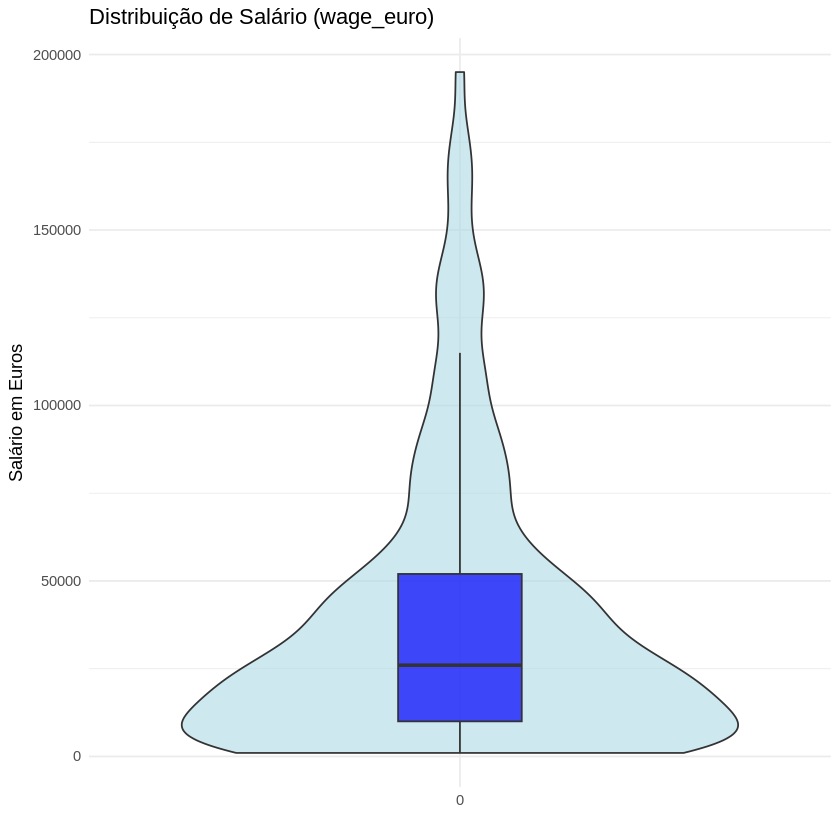

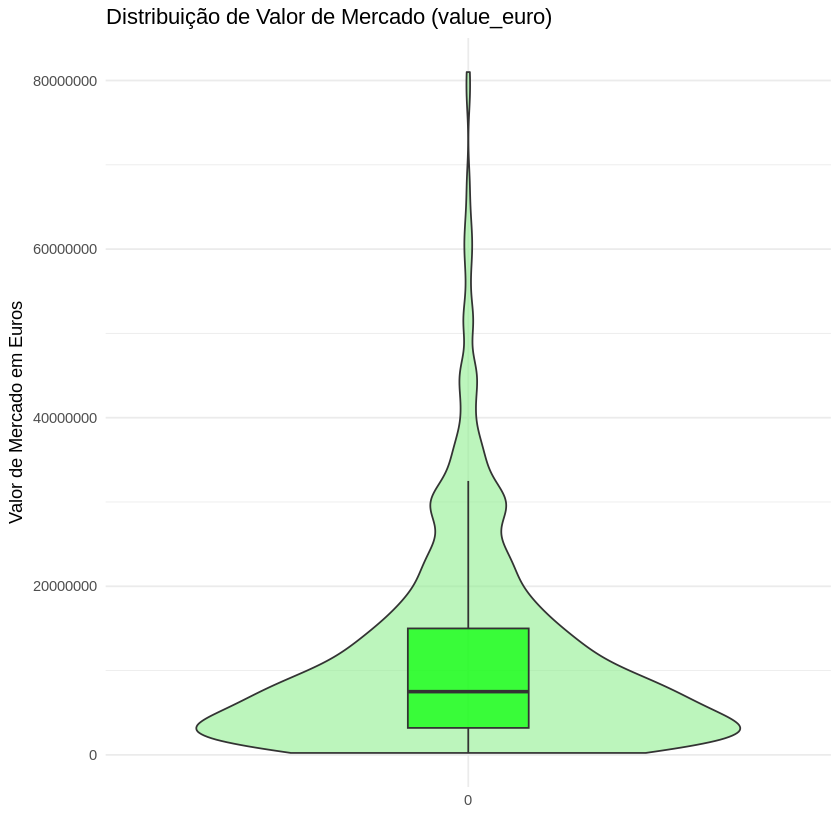

In [ ]:
# Instala e carrega as bibliotecas necessárias
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
library(ggplot2)

# Filtra o dataset para remover valores extremos (opcional, para melhor visualização)
fifa_filtered <- fifa %>% filter(wage_euro < 200000, value_euro < 1e8)

# Gráfico de Boxplot com Violin Plot para 'wage_euro' e 'value_euro'
ggplot(fifa_filtered, aes(x = factor(0), y = wage_euro)) +
  geom_violin(fill = "lightblue", alpha = 0.6) +
  geom_boxplot(width = 0.2, fill = "blue", alpha = 0.7, outlier.shape = NA) +
  labs(title = "Distribuição de Salário (wage_euro)", y = "Salário em Euros", x = "") +
  theme_minimal()

ggplot(fifa_filtered, aes(x = factor(0), y = value_euro)) +
  geom_violin(fill = "lightgreen", alpha = 0.6) +
  geom_boxplot(width = 0.2, fill = "green", alpha = 0.7, outlier.shape = NA) +
  labs(title = "Distribuição de Valor de Mercado (value_euro)", y = "Valor de Mercado em Euros", x = "") +
  theme_minimal()


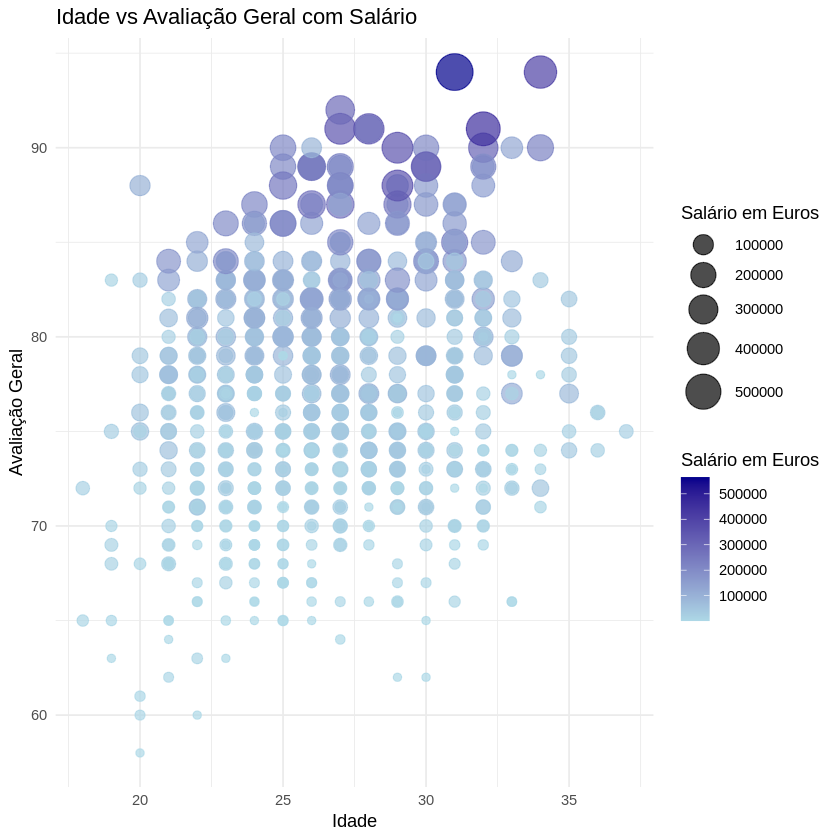

In [ ]:
# Gráfico de dispersão para 'age' vs 'overall_rating' com tamanho e cor de 'wage_euro'
ggplot(fifa, aes(x = age, y = overall_rating, color = wage_euro, size = wage_euro)) +
  geom_point(alpha = 0.7) +
  scale_color_gradient(low = "lightblue", high = "darkblue") +
  scale_size(range = c(2, 10)) +
  labs(title = "Idade vs Avaliação Geral com Salário",
       x = "Idade",
       y = "Avaliação Geral",
       color = "Salário em Euros",
       size = "Salário em Euros") +
  theme_minimal()


### 4. At Least Two Creative Graphs to Aid in Results Visualization

#### 1. Salary and Market Value Distribution Plot
This graph combines **boxplot** and **violin plot** to display the distribution of players' **salaries** and **market values**. It highlights the concentration of players in lower salary and market value ranges, with some outliers representing renowned players with significantly higher salaries and market values. This visualization clearly demonstrates the **salary and market value inequality** in football, where a few players earn and are valued much higher than the category average.

#### 2. Scatter Plot of Age vs Overall Rating with Salary
The scatter plot shows the relationship between players' **age** and **overall rating**, with **salary** represented by the size and color of the points. This graph reveals that players with higher ratings tend to have higher salaries, especially those in the age range of **25 to 30 years**. This period appears to be the peak in terms of valuation, where age and performance converge to determine elevated salaries. Additionally, younger players with high ratings indicate potential salary growth with experience.

These two graphs provide critical insights into the salary profile and market value of football players, as well as the valuation associated with age and performance in the sport.


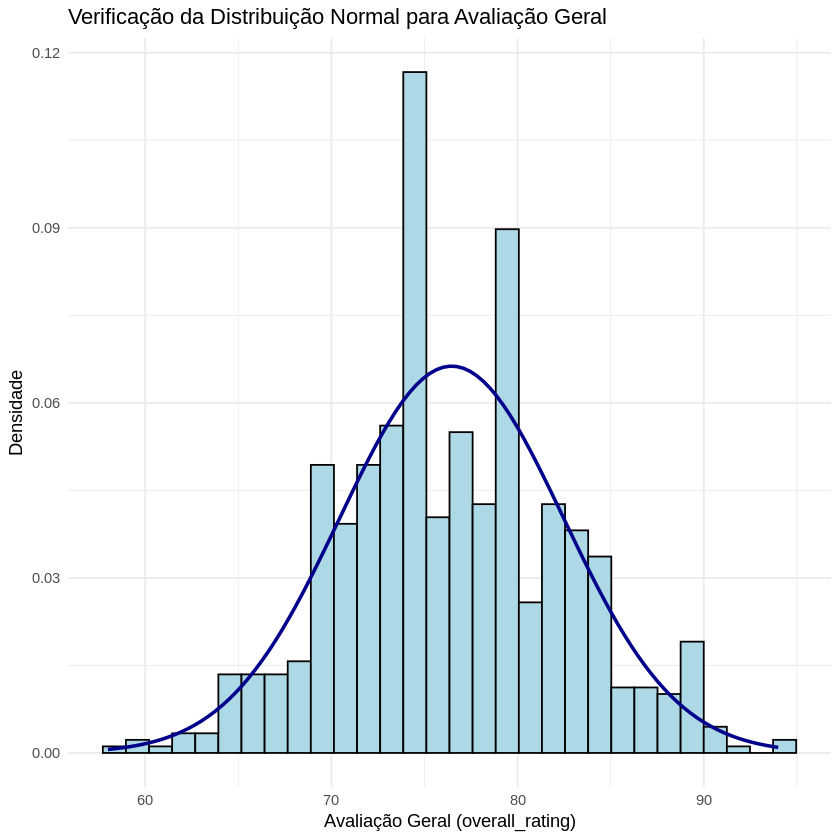

In [ ]:
# Calcula a média e o desvio padrão de `overall_rating`
mean_rating <- mean(fifa$overall_rating, na.rm = TRUE)
sd_rating <- sd(fifa$overall_rating, na.rm = TRUE)

# Histograma de `overall_rating` com sobreposição da distribuição Normal esperada
ggplot(fifa, aes(x = overall_rating)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean_rating, sd = sd_rating), color = "darkblue", linewidth = 1) +
  labs(title = "Verificação da Distribuição Normal para Avaliação Geral",
       x = "Avaliação Geral (overall_rating)",
       y = "Densidade") +
  theme_minimal()


### 5. Verification of Probabilistic Model Adequacy for `overall_rating`

To verify the adequacy of a probabilistic model for the variable **`overall_rating`**, we used a **histogram** overlaid with the density curve of the **Normal Distribution**.

#### Choice of the Normal Distribution
The variable `overall_rating` represents the players' overall rating and exhibits a symmetric distribution around the mean. This suggests that the **Normal Distribution** is a good candidate for modeling this variable.

#### Procedure
1. **Parameters**: We calculated the **mean** and **standard deviation** of `overall_rating` to define the parameters of the normal curve.
2. **Histogram and Density Curve**: We plotted a histogram of the actual data and overlaid the normal distribution curve to visualize the fit.

#### Results
The graph shows that the **Normal Distribution** provides a reasonable fit for `overall_rating`, capturing the symmetry around the mean. However, some **outliers** are observed, causing slight deviations from the expected curve.

#### Conclusion
Despite the presence of outliers, the **Normal Distribution** was deemed suitable for modeling the `overall_rating` variable, as it captures most values around the mean with a dispersion that corresponds to the observed standard deviation.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


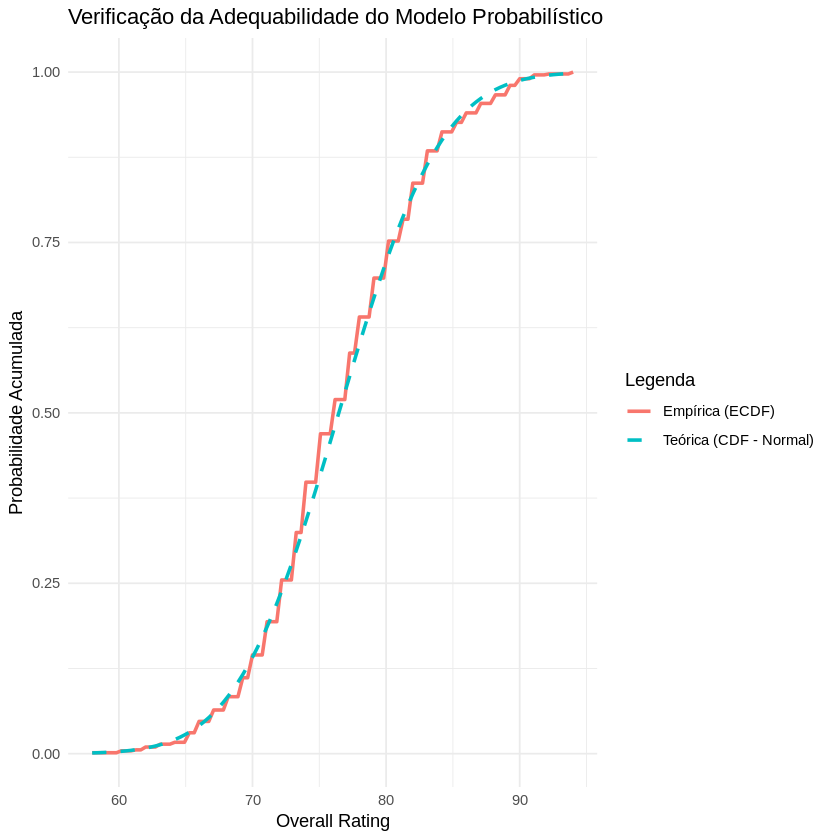

In [ ]:
# Define a média e o desvio padrão da variável `overall_rating`
mean_rating <- mean(fifa$overall_rating, na.rm = TRUE)
sd_rating <- sd(fifa$overall_rating, na.rm = TRUE)

# Criação da função acumulada empírica (ECDF)
empirical_cdf <- ecdf(fifa$overall_rating)

# Criação da função acumulada teórica (CDF) com base na Distribuição Normal
theoretical_cdf <- function(x) pnorm(x, mean = mean_rating, sd = sd_rating)

# Criando o gráfico de comparação entre ECDF e CDF
library(ggplot2)

# Definindo os valores de `x` para o gráfico
x_values <- seq(min(fifa$overall_rating, na.rm = TRUE), max(fifa$overall_rating, na.rm = TRUE), length.out = 100)

# Criando o dataframe para plotar
cdf_data <- data.frame(
  x = x_values,
  ECDF = empirical_cdf(x_values),
  CDF = theoretical_cdf(x_values)
)

# Gráfico com ggplot2
ggplot(cdf_data, aes(x = x)) +
  geom_line(aes(y = ECDF, color = "Empírica (ECDF)"), size = 1) +
  geom_line(aes(y = CDF, color = "Teórica (CDF - Normal)"), size = 1, linetype = "dashed") +
  labs(title = "Verificação da Adequabilidade do Modelo Probabilístico",
       x = "Overall Rating",
       y = "Probabilidade Acumulada",
       color = "Legenda") +
  theme_minimal()


### Criterion 6: Verification of Probabilistic Model Adequacy

#### Objective
Verify the adequacy of the **Normal Distribution** as a probabilistic model for the variable `overall_rating`, by comparing the **empirical cumulative distribution function (ECDF)** with the **theoretical cumulative distribution function (CDF)**.

#### Procedure
1. **Calculation of the Empirical Cumulative Distribution Function (ECDF)**:
   - The **ECDF** was constructed from the real values of `overall_rating`, representing the cumulative proportion of observed values.

2. **Calculation of the Theoretical Cumulative Distribution Function (CDF)**:
   - The **Normal Distribution** was fitted based on the mean and standard deviation parameters of `overall_rating`.
   - The theoretical cumulative function was calculated using the `pnorm()` function.

3. **Graphical Comparison**:
   - The empirical and theoretical cumulative functions were compared graphically to evaluate the closeness between the two models.

#### Observed Results
In the generated graph:
- **Red Curve (ECDF)**: Represents the empirical cumulative function of the real values of `overall_rating`.
- **Blue Dashed Curve (CDF)**: Represents the theoretical cumulative function based on the Normal Distribution.

The analysis of the graph indicates that:
- The empirical and theoretical curves are very close, with evident overlap over almost the entire range of values.
- Small differences at the extremes (very low or very high values) reflect the influence of outliers or extreme deviations.

#### Conclusion
The **Normal Distribution** proved to be a suitable probabilistic model for the `overall_rating` variable, as the theoretical cumulative function closely fits the empirical cumulative function. This indicates that most of the data follow the expected behavior of a normal distribution, with minor discrepancies at the extremes.
